In [ ]:
path = 'path/to/data_folder'

In [ ]:
import pandas as pd

path_sent_sentiment_tmp = path+"yelp_sent_sentiment_tmp_0609.csv"
df_sent_sentiment_tmp = pd.read_csv(path_sent_sentiment_tmp)
df_sent_sentiment_tmp.head()

,review_id,peak_end_avg,all_sent_avg,peak,begin,end
0,0,-6.694527,-5.208088,-8.140498,-6.260915,-5.248557
1,1,-7.016100,-1.487496,-7.016100,-3.270081,-7.016100
2,2,-7.289779,-4.816099,-8.469959,-7.368086,-6.109599
3,3,-8.316386,-5.619466,-8.468254,-7.553752,-8.164517
4,4,-4.171422,-4.381145,-8.420035,-7.998977,0.077190


In [ ]:
import pandas as pd

path_sent_senti = path+"yelp_sent_senti_pred.csv"
df_sent_senti = pd.read_csv(path_sent_senti)
df_sent_senti.head()

,review_id,sentence_id,sentence_text,sentence_sentiment
0,0,0,I got 'new' tires from them and within two wee...,-8.140498
1,0,1,I took my car to a local mechanic to see if i ...,-8.074585
2,0,2,I just got the tire and never needed to have i...,1.284610
3,0,3,This was supposed to be a new tire. \nI took t...,-7.036401
4,0,4,So there are resentful tire slashers? I find t...,-1.809622


In [ ]:
df_sent_senti[df_sent_senti['review_id']==33596]

,review_id,sentence_id,sentence_text,sentence_sentiment
236358,33596,0,"Wow, that New York-style thin crust! It is the...",6.400794
236359,33596,1,and I've had my fair share of pizzas.,6.090670
236360,33596,2,"The toppings are fresh and plenty, especially ...",8.812939
236361,33596,3,They were sweet and spicy! Definitely going to...,5.661693


In [ ]:
path_doc_disc = path+"yelp_discourse_0609.csv"
df_doc_disc = pd.read_csv(path_doc_disc)
df_doc_disc.head()

,review_id,score_type1,score_type2
0,0,0.743065,0.769247
1,2,0.687154,0.792379
2,3,0.604758,0.715736
3,4,0.808605,0.803613
4,5,0.823295,0.760765


In [ ]:
len(df_doc_disc[df_doc_disc['score_type1']>=df_doc_disc['score_type2']])

16766

In [ ]:
len(df_doc_disc[df_doc_disc['score_type1']<df_doc_disc['score_type2']])

18085

In [ ]:
df_sent_sentiment_tmp[df_sent_sentiment_tmp['review_id']==107]

,review_id,peak_end_avg,all_sent_avg,peak,begin,end
107,107,2.232326,-0.217533,8.756083,-3.982909,-4.291431


In [ ]:
df_doc_senti_true[df_sent_sentiment_tmp['review_id']==2515]

,review_id,review_text,true_label
2515,2515,ordered the steak sandwich (medium rare). Cam...,0


In [ ]:
df_sent_sentiment_tmp[df_sent_sentiment_tmp['review_id']==789]

,review_id,peak_end_avg,all_sent_avg,peak,begin,end
789,789,6.898265,2.95459,7.250697,2.889218,6.545833


In [ ]:
df_sent_sentiment_tmp[df_sent_sentiment_tmp['review_id']==35285.0]

,review_id,peak_end_avg,all_sent_avg,peak,begin,end
35285,35285,0.658671,5.040405,8.330054,7.453424,-7.012712


In [ ]:
import math
for i in range(len(df_doc_disc)):
    review_id = df_doc_disc.iloc[i]['review_id']
    score_type1 = df_doc_disc.iloc[i]['score_type1']
    score_type2 = df_doc_disc.iloc[i]['score_type2']
    lambda_1 = df_sent_sentiment_tmp[df_sent_sentiment_tmp['review_id']==review_id].iloc[0]['all_sent_avg']
    lambda_2 = df_sent_sentiment_tmp[df_sent_sentiment_tmp['review_id']==review_id].iloc[0]['peak_end_avg']
    label = df_doc_senti_true[df_sent_sentiment_tmp['review_id']==review_id].iloc[0]['true_label']
    if score_type1 == 1 and abs(lambda_1)>abs(lambda_2) and label!=0:
        print(review_id)

5842.0
6826.0
9004.0
15242.0
18238.0
27262.0
28143.0
33596.0
35285.0


In [ ]:
score_type1 = df_doc_disc.iloc[df_doc_disc['review_id']==33596].iloc[0]['score_type1']

NotImplementedError: ignored

In [ ]:

review_id = 33596
lambda_1 = df_sent_sentiment_tmp[df_sent_sentiment_tmp['review_id']==review_id].iloc[0]['all_sent_avg']
lambda_2 = df_sent_sentiment_tmp[df_sent_sentiment_tmp['review_id']==review_id].iloc[0]['peak_end_avg']
label = df_doc_senti_true[df_sent_sentiment_tmp['review_id']==review_id].iloc[0]['true_label']
print(lambda_1, lambda_2)
print(label)

6.246227393917874 5.180457579524584
1


In [ ]:
df_doc_disc[df_doc_disc['score_type1']==1][-40:-20]

,review_id,score_type1,score_type2
11939,17022,1.0,0.876235
12762,18184,1.0,0.637238
12804,18238,1.0,0.864635
13547,19354,1.0,0.877227
13553,19368,1.0,0.819944
13743,19650,1.0,0.668087
15386,22058,1.0,0.761984
16574,23774,1.0,0.838042
17189,24660,1.0,0.968656
17975,25827,1.0,0.773724


In [ ]:
df_doc_disc[df_doc_disc['score_type2']==1]

,review_id,score_type1,score_type2
321,442,0.950229,1.0
427,584,0.878490,1.0
480,663,0.863012,1.0
785,1136,0.965153,1.0
1419,2023,0.744703,1.0
...,...,...,...
33804,48546,0.676609,1.0
34132,49006,0.770185,1.0
34351,49311,0.876082,1.0
34593,49642,0.704879,1.0


In [ ]:
path_pairs = path+"yelp_pairs.csv"
df_pairs = pd.read_csv(path_pairs)
df_pairs.head()

,corpus1_idx,corpus2_idx
0,17684,30627
1,43774,21664
2,33691,35103
3,11114,41441
4,12969,11978


In [ ]:
df_pairs['corpus1_idx'].tolist()[:10]

[17684, 43774, 33691, 11114, 12969, 14123, 42553, 15007, 19553, 30152]

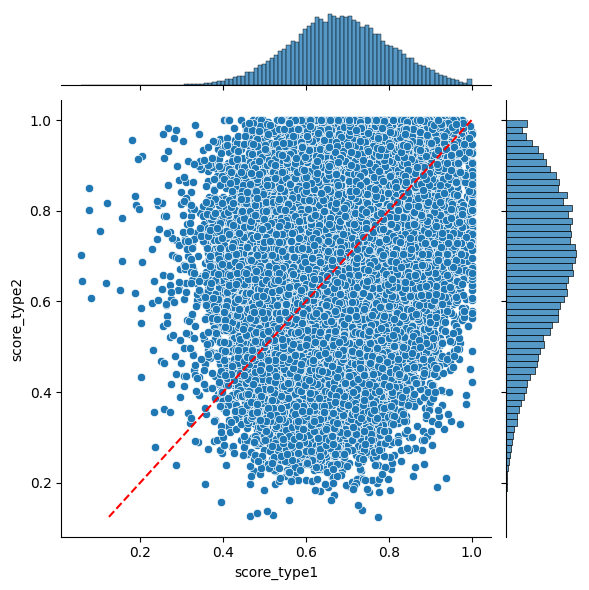

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_joint_distribution(data, x, y):
    """
    使用Seaborn绘制联合分布图

    参数:
    - data: 包含数据的DataFrame
    - x: x轴上的列名
    - y: y轴上的列名
    """
    sns.jointplot(data=data, x=x, y=y, kind='scatter')
    plt.plot([max(data[x].min(), data[y].min()), min(data[x].max(), data[y].max())],
             [max(data[x].min(), data[y].min()), min(data[x].max(), data[y].max())], color='r', linestyle='--')

    # 显示图形
    plt.show()

plot_joint_distribution(df_doc_disc, "score_type1", "score_type2")

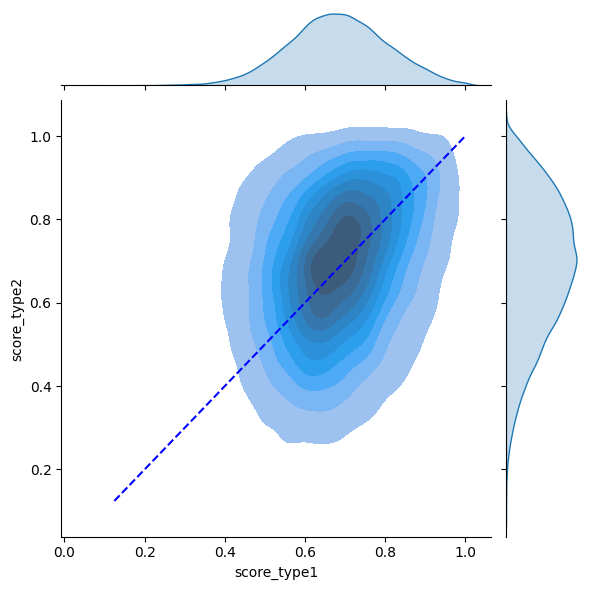

In [ ]:
def plot_joint_distribution(data, x, y, save_path=None):
    sns.jointplot(data=data, x=x, y=y, kind='kde', fill = True)
    plt.plot([max(data[x].min(), data[y].min()), min(data[x].max(), data[y].max())],
             [max(data[x].min(), data[y].min()), min(data[x].max(), data[y].max())], color='b', linestyle='--')

    if save_path is not None:
        plt.savefig(save_path, format='pdf')

    plt.show()

plot_joint_distribution(df_doc_disc, "score_type1", "score_type2", "discourse_score_distribution.pdf")


In [ ]:
len(df_doc_disc[df_doc_disc['score_type1']>df_doc_disc['score_type2']])

16766

In [ ]:
len(df_doc_disc[df_doc_disc['score_type2']>df_doc_disc['score_type1']])

18085

In [ ]:
df_doc_disc[df_doc_disc['score_type1']>0.999]

,review_id,score_type1,score_type2
73,107,1.0,0.824278
570,789,1.0,0.563193
1623,2315,1.0,0.740703
1755,2515,1.0,0.932303
1785,2563,1.0,0.927096
...,...,...,...
31124,44747,1.0,0.908656
31249,44953,1.0,0.859513
31887,45842,1.0,0.661902
33160,47652,1.0,0.800709


In [ ]:
df_doc_disc[df_doc_disc['score_type2']==1][:20]

,review_id,score_type1,score_type2
321,442,0.950229,1.0
427,584,0.878490,1.0
480,663,0.863012,1.0
785,1136,0.965153,1.0
1419,2023,0.744703,1.0
1471,2099,0.834992,1.0
1891,2713,0.871960,1.0
1976,2849,0.844010,1.0
2114,3041,0.671482,1.0
2150,3089,0.796835,1.0


In [ ]:
len(df_doc_disc[df_doc_disc['score_type1']>df_doc_disc['score_type2']])

16766

In [ ]:
len(df_doc_disc[df_doc_disc['score_type1']<df_doc_disc['score_type2']])

18085

In [ ]:
path_doc_senti_true = path+"yelp_doc_senti_true.csv"
df_doc_senti_true = pd.read_csv(path_doc_senti_true)
df_doc_senti_true.head()

,review_id,review_text,true_label
0,0,I got 'new' tires from them and within two wee...,-1
1,1,Don't waste your time. We had two different p...,-1
2,2,All I can say is the worst! We were the only 2...,-1
3,3,I have been to this restaurant twice and was d...,-1
4,4,Food was NOT GOOD at all! My husband & I ate h...,-1


In [ ]:
len(df_sent_sentiment_tmp)

50000

In [ ]:
len(df_doc_disc)

34851

In [ ]:
import numpy as np
def extract_review_id(subdf):
    return np.array(subdf['review_id']).tolist()
len(extract_review_id(df_doc_disc[df_doc_disc['score_type1']>0.9]))

1314

In [ ]:
len(extract_review_id(df_doc_disc[df_doc_disc['score_type2']>0.6]))

24427

In [ ]:
def extract_dict(df):
    result_dict = {}
    for i in range(len(df)):
        item = df.iloc[i]
        result_dict[item['review_id']] = dict(item)
    return result_dict
dict_docTrue = extract_dict(df_doc_senti_true)

In [ ]:
dict_docTrue[1]

{'review_id': 1,
 'review_text': "Don't waste your time.  We had two different people come to our house to give us estimates for a deck (one of them the OWNER).  Both times, we never heard from them.  Not a call, not the estimate, nothing.",
 'true_label': -1}

In [ ]:
dict_docDisc = extract_dict(df_doc_disc)
dict_docDisc[2]

{'review_id': 2.0,
 'score_type1': 0.687153667334228,
 'score_type2': 0.7923790348691373}

In [ ]:
dict_sent_sentiment_tmp = extract_dict(df_sent_sentiment_tmp)
dict_sent_sentiment_tmp[1]

{'review_id': 1.0,
 'peak_end_avg': -7.016100333212741,
 'all_sent_avg': -1.4874961489586151,
 'peak': -7.016100333212741,
 'begin': -3.270080913062717,
 'end': -7.016100333212741}

In [ ]:
dict_sent_sentiment_tmp[7796]

{'review_id': 7796.0,
 'peak_end_avg': 8.614286038116418,
 'all_sent_avg': 2.9184328826006083,
 'peak': 8.750044652467867,
 'begin': 6.450715933678754,
 'end': 8.47852742376497}

In [ ]:
dict_sent_sentiment_tmp[8521]

{'review_id': 8521.0,
 'peak_end_avg': -7.021614792093818,
 'all_sent_avg': -5.974822576329252,
 'peak': -7.242571944746659,
 'begin': -6.959440156551395,
 'end': -6.800657639440975}

In [ ]:
def compare_subset(subset):
    print("length_subset", len(subset))
    peak_end_avg, all_sent_avg, label = [], [], []
    begin, end, peak = [], [], []
    for i in subset:
        peak_end_avg.append(dict_sent_sentiment_tmp[i]['peak_end_avg'])
        all_sent_avg.append(dict_sent_sentiment_tmp[i]['all_sent_avg'])
        label.append(dict_docTrue[i]['true_label'])
        begin.append(dict_sent_sentiment_tmp[i]['begin'])
        end.append(dict_sent_sentiment_tmp[i]['end'])
        peak.append(dict_sent_sentiment_tmp[i]['peak'])
    from scipy.stats import pearsonr
    print("peak_end_avg and true_label: ", pearsonr(peak_end_avg, label))
    print("all_sent_avg and true_label: ", pearsonr(all_sent_avg, label))
    print("begin and true_label: ", pearsonr(begin, label))
    print("end and true_label: ", pearsonr(end, label))
    print("peak and true_label: ", pearsonr(peak, label))


compare_subset(extract_review_id(df_doc_disc[df_doc_disc['score_type1']>0.8726]))

length_subset 2161
peak_end_avg and true_label:  PearsonRResult(statistic=0.7007530121009322, pvalue=5.50014e-319)
all_sent_avg and true_label:  PearsonRResult(statistic=0.7749633838034357, pvalue=0.0)
begin and true_label:  PearsonRResult(statistic=0.7748308877881918, pvalue=0.0)
end and true_label:  PearsonRResult(statistic=0.5072903356472765, pvalue=1.1080770142641211e-141)
peak and true_label:  PearsonRResult(statistic=0.6825351716041662, pvalue=2.5652435664927917e-296)


In [ ]:
compare_subset(extract_review_id(df_doc_disc[df_doc_disc['score_type2']>0.5]))

length_subset 29807
peak_end_avg and true_label:  PearsonRResult(statistic=0.6729863515631456, pvalue=0.0)
all_sent_avg and true_label:  PearsonRResult(statistic=0.7890469259537993, pvalue=0.0)


In [ ]:
compare_subset(extract_review_id(df_doc_disc))

length_subset 34851
peak_end_avg and true_label:  PearsonRResult(statistic=0.6591141371574525, pvalue=0.0)
all_sent_avg and true_label:  PearsonRResult(statistic=0.7842401447561016, pvalue=0.0)


In [ ]:
compare_subset(extract_review_id(df_doc_disc[df_doc_disc['score_type1']>df_doc_disc['score_type2']]))

length_subset 16766
peak_end_avg and true_label:  PearsonRResult(statistic=0.6330900253454397, pvalue=0.0)
all_sent_avg and true_label:  PearsonRResult(statistic=0.7697738515134915, pvalue=0.0)
begin and true_label:  PearsonRResult(statistic=0.7799684741359685, pvalue=0.0)
end and true_label:  PearsonRResult(statistic=0.48398365354026984, pvalue=0.0)
peak and true_label:  PearsonRResult(statistic=0.5650086690135145, pvalue=0.0)


In [ ]:
compare_subset(extract_review_id(df_doc_disc[df_doc_disc['score_type1']<df_doc_disc['score_type2']]))

length_subset 18085
peak_end_avg and true_label:  PearsonRResult(statistic=0.6811767763279053, pvalue=0.0)
all_sent_avg and true_label:  PearsonRResult(statistic=0.7949845800501285, pvalue=0.0)
begin and true_label:  PearsonRResult(statistic=0.8028524288496566, pvalue=0.0)
end and true_label:  PearsonRResult(statistic=0.5017216692561072, pvalue=0.0)
peak and true_label:  PearsonRResult(statistic=0.6457989312239811, pvalue=0.0)


In [ ]:
extract_review_id(df_doc_disc[df_doc_disc['score_type1']>0.8726])[:10]

[71, 100, 107, 171, 180, 199, 242, 260, 280, 287]

In [ ]:
compare_subset(df_pairs['corpus1_idx'].tolist())

length_subset 319
peak_end_avg and true_label:  PearsonRResult(statistic=0.6626994129095178, pvalue=1.0416407059365382e-41)
all_sent_avg and true_label:  PearsonRResult(statistic=0.7980949109112647, pvalue=1.0043415043538703e-71)
begin and true_label:  PearsonRResult(statistic=0.8115382347664236, pvalue=5.813951324091986e-76)
end and true_label:  PearsonRResult(statistic=0.44525657784695966, pvalue=6.123477916396121e-17)
peak and true_label:  PearsonRResult(statistic=0.614096699744351, pvalue=1.8805520626533276e-34)


In [ ]:
compare_subset(df_pairs['corpus2_idx'].tolist())

length_subset 319
peak_end_avg and true_label:  PearsonRResult(statistic=0.7173996581728508, pvalue=1.0765021527372062e-51)
all_sent_avg and true_label:  PearsonRResult(statistic=0.8352135705783238, pvalue=2.541317692631592e-84)
begin and true_label:  PearsonRResult(statistic=0.8242220158303737, pvalue=2.7673734892002935e-80)
end and true_label:  PearsonRResult(statistic=0.5672188048431476, pvalue=1.4827857287273111e-28)
peak and true_label:  PearsonRResult(statistic=0.6631954016926288, pvalue=8.642381981843369e-42)


length_subset 319
Mean:  0.8300989321666914
Std:  5.848225502494448
Std random:  6.50021367497719
Std Err:  0.3274377661227679


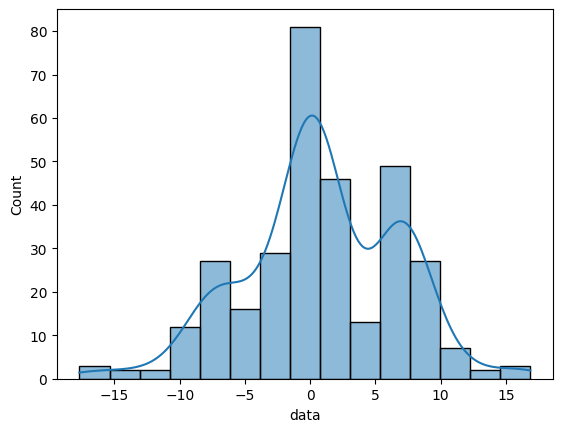

"\n    for i in subset:\n        peak_end_avg.append(dict_sent_sentiment_tmp[i]['peak_end_avg'])\n        all_sent_avg.append(dict_sent_sentiment_tmp[i]['all_sent_avg'])\n        label.append(dict_docTrue[i]['true_label'])\n        begin.append(dict_sent_sentiment_tmp[i]['begin'])\n        end.append(dict_sent_sentiment_tmp[i]['end'])\n        peak.append(dict_sent_sentiment_tmp[i]['peak'])\n"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_1D_data(data):
    df = pd.DataFrame(data, columns=['data'])
    sns.histplot(data=df, x='data', kde=True)
    plt.show()

def compare_subset_matched_pair(subset1, subset2, column = "all_sent_avg"):
    print("length_subset", len(subset1))
    li = []
    #np.random.shuffle(subset2)
    for l in range(len(subset1)):
        i, j = subset1[l], subset2[l]
        li.append(dict_sent_sentiment_tmp[j][column]*dict_docTrue[j]['true_label']-dict_sent_sentiment_tmp[i][column]*dict_docTrue[i]['true_label'])
    np.random.shuffle(subset2)
    li_random = []
    for l in range(len(subset1)):
        i, j = subset1[l], subset2[l]
        li_random.append(dict_sent_sentiment_tmp[j][column]*dict_docTrue[j]['true_label']-dict_sent_sentiment_tmp[i][column]*dict_docTrue[i]['true_label'])
    print("Mean: ", np.mean(li))
    print("Std: ", np.std(li))
    print("Std random: ", np.std(li_random))
    print("Std Err: ",np.std(li) / np.sqrt(len(li)))
    plot_1D_data(li)
compare_subset_matched_pair(df_pairs['corpus1_idx'].tolist(), df_pairs['corpus2_idx'].tolist(), column = "peak_end_avg")
"""
    for i in subset:
        peak_end_avg.append(dict_sent_sentiment_tmp[i]['peak_end_avg'])
        all_sent_avg.append(dict_sent_sentiment_tmp[i]['all_sent_avg'])
        label.append(dict_docTrue[i]['true_label'])
        begin.append(dict_sent_sentiment_tmp[i]['begin'])
        end.append(dict_sent_sentiment_tmp[i]['end'])
        peak.append(dict_sent_sentiment_tmp[i]['peak'])
"""

In [ ]:
def compare_subset_accuracy(subset):
    print("length_subset", len(subset))
    count, sum = 0, 0
    for i in subset:
        if dict_docTrue[i]['true_label']==1 or dict_docTrue[i]['true_label']==-1:
            if dict_docTrue[i]['true_label']==1:
                count+=dict_review_sentiment[i]['all_sent_avg']>0
            else:
                count+=dict_review_sentiment[i]['all_sent_avg']<0
            sum+=1
    print("total:", sum)
    print("accuracy:", count/sum)
compare_subset_accuracy(extract_review_id(df_doc_disc))

length_subset 34851
total: 27712
accuracy: 0.9181581986143187


In [ ]:
def compare_subset_accuracy(subset):
    print("length_subset", len(subset))
    count, sum = 0, 0
    for i in subset:
        if dict_docTrue[i]['true_label']==1 or dict_docTrue[i]['true_label']==-1:
            if dict_review_sentiment.get(i)==None:
                continue
            if dict_docTrue[i]['true_label']==1:
                count+=dict_review_sentiment[i]>0
            else:
                count+=dict_review_sentiment[i]<0
            sum+=1
    print("total:", sum)
    print("accuracy:", count/sum)
compare_subset_accuracy(extract_review_id(df_doc_disc))

length_subset 34851
total: 25763
accuracy: 0.9102200830648605


In [ ]:
import pandas as pd

path_senti_pred = path+"yelp_senti_pred_0609.csv"
df_sent_senti_pred = pd.read_csv(path_senti_pred)
df_sent_senti_pred.head()

,review_id,review_text,review_sentiment,cut_flag
0,0,I got 'new' tires from them and within two wee...,-6.260915,False
1,1,Don't waste your time. We had two different p...,-3.270081,False
2,2,All I can say is the worst! We were the only 2...,-7.368086,False
3,3,I have been to this restaurant twice and was d...,-7.553752,False
4,4,Food was NOT GOOD at all! My husband & I ate h...,-7.998977,False


In [ ]:
dict_review_sentiment = {}
for i in range(len(df_sent_senti_pred)):
    item = df_sent_senti_pred.iloc[i]
    if item['cut_flag']:
        continue
    dict_review_sentiment[item['review_id']] = item['review_sentiment'].copy()

In [ ]:
len(dict_review_sentiment)

47551

In [ ]:
df_sent_senti_pred[1]

0       -3.270081
1       -3.270081
2       -3.270081
3       -3.270081
4       -3.270081
           ...   
49995   -3.270081
49996   -3.270081
49997   -3.270081
49998   -3.270081
49999   -3.270081
Name: 1, Length: 50000, dtype: float64

In [ ]:
import pandas as pd

path_sent_sentiment_tmp = path+"amazon_sent_sentiment_tmp.csv"
df_sent_sentiment_tmp = pd.read_csv(path_sent_sentiment_tmp)
df_sent_sentiment_tmp.head()

,review_id,peak_end_avg,all_sent_avg,peak,begin,end
0,0,-8.532749,-5.613471,-8.532749,-6.965369,-8.532749
1,1,-6.780058,-3.891096,-8.444131,-6.703739,-5.115985
2,2,-6.852338,-5.686874,-8.235282,-7.933328,-5.469393
3,3,-8.490959,-5.797876,-8.515934,-8.185697,-8.465985
4,4,-6.336684,-4.820422,-8.571650,-6.454623,-4.101717


In [ ]:
path_doc_disc = path+"amazon_discourse.csv"
df_doc_disc = pd.read_csv(path_doc_disc)
df_doc_disc.head()

,review_id,score_type1,score_type2
0,0,0.629000,0.839762
1,1,0.635136,0.834571
2,2,0.662217,0.604334
3,3,0.733568,0.807557
4,4,0.675061,0.885900


In [ ]:
df_doc_disc.tail()

,review_id,score_type1,score_type2
2577,2577,0.611971,0.760824
2578,2578,0.820911,0.708590
2579,2579,0.776387,0.907554
2580,2580,0.555724,0.677069
2581,2581,0.613347,0.562983


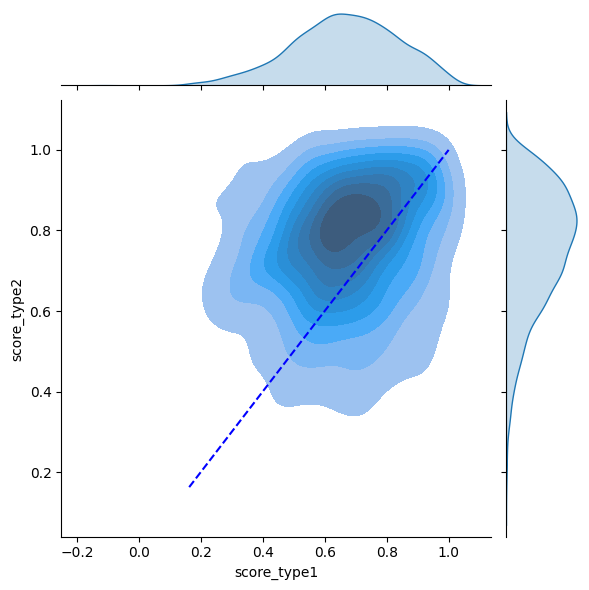

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_joint_distribution(data, x, y, save_path=None):
    sns.jointplot(data=data, x=x, y=y, kind='kde', fill = True)
    plt.plot([max(data[x].min(), data[y].min()), min(data[x].max(), data[y].max())],
             [max(data[x].min(), data[y].min()), min(data[x].max(), data[y].max())], color='b', linestyle='--')

    if save_path is not None:
        plt.savefig(save_path, format='pdf')

    plt.show()

plot_joint_distribution(df_doc_disc, "score_type1", "score_type2", "amazon_discourse_score_distribution.pdf")


In [ ]:
path_doc_senti_true = path+"amazon_doc_senti_true.csv"
df_doc_senti_true = pd.read_csv(path_doc_senti_true)
df_doc_senti_true.head()

,review_id,review_text,true_label,stars
0,en_0968227,Not worth the price and very bad cap design. P...,-1,1
1,en_0830781,"Garbage!. Shoes were purchased on March 6, 201...",-1,1
2,en_0277954,I do not recommend this printer. It's taken me...,-1,1
3,en_0931571,Not happy. I ordered this giving the correct s...,-1,1
4,en_0157705,I was taking the color out with vitamin c tabl...,-1,1


In [ ]:
import numpy as np
def extract_review_id(subdf):
    return np.array(subdf['review_id']).tolist()
len(extract_review_id(df_doc_disc[df_doc_disc['score_type1']>0.9]))

224

In [ ]:
def extract_dict(df):
    result_dict = {}
    for i in range(len(df)):
        item = df.iloc[i]
        result_dict[item['review_id']] = dict(item)
    return result_dict
dict_docTrue = extract_dict(df_doc_senti_true)

In [ ]:
dict_sent_sentiment_tmp[1]

{'review_id': 1.0,
 'peak_end_avg': -6.780058064573224,
 'all_sent_avg': -3.891095725651981,
 'peak': -8.44413119249275,
 'begin': -6.703739209953267,
 'end': -5.115984936653698}

In [ ]:
dict_docTrue[2]

KeyError: ignored

In [ ]:
dict_docDisc = extract_dict(df_doc_disc)
dict_sent_sentiment_tmp = extract_dict(df_sent_sentiment_tmp)

def compare_subset(subset):
    print("length_subset", len(subset))
    peak_end_avg, all_sent_avg, label = [], [], []
    begin, end, peak = [], [], []
    for i in subset:
        idx = df_doc_senti_true.iloc[i]['review_id']
        peak_end_avg.append(dict_sent_sentiment_tmp[i]['peak_end_avg'])
        all_sent_avg.append(dict_sent_sentiment_tmp[i]['all_sent_avg'])
        label.append(dict_docTrue[idx]['true_label'])
        begin.append(dict_sent_sentiment_tmp[i]['begin'])
        end.append(dict_sent_sentiment_tmp[i]['end'])
        peak.append(dict_sent_sentiment_tmp[i]['peak'])
    from scipy.stats import pearsonr
    print("peak_end_avg and true_label: ", pearsonr(peak_end_avg, label))
    print("all_sent_avg and true_label: ", pearsonr(all_sent_avg, label))
    print("begin and true_label: ", pearsonr(begin, label))
    print("end and true_label: ", pearsonr(end, label))
    print("peak and true_label: ", pearsonr(peak, label))


compare_subset(extract_review_id(df_doc_disc[df_doc_disc['score_type1']>df_doc_disc['score_type2']]))

length_subset 803
peak_end_avg and true_label:  PearsonRResult(statistic=0.6780819583791295, pvalue=3.219187472382925e-109)
all_sent_avg and true_label:  PearsonRResult(statistic=0.7357045720230746, pvalue=1.0959568991413932e-137)
begin and true_label:  PearsonRResult(statistic=0.7074156163426739, pvalue=7.677631367628826e-123)
end and true_label:  PearsonRResult(statistic=0.47717959705193663, pvalue=6.725352241902678e-47)
peak and true_label:  PearsonRResult(statistic=0.6384426478290183, pvalue=3.74769753132563e-93)


In [ ]:
compare_subset(extract_review_id(df_doc_disc[df_doc_disc['score_type1']<df_doc_disc['score_type2']]))

length_subset 1779
peak_end_avg and true_label:  PearsonRResult(statistic=0.686973883336772, pvalue=1.1192805424727257e-248)
all_sent_avg and true_label:  PearsonRResult(statistic=0.7784946874821798, pvalue=0.0)
begin and true_label:  PearsonRResult(statistic=0.7761911183406609, pvalue=0.0)
end and true_label:  PearsonRResult(statistic=0.4912722324963293, pvalue=1.0060016185202136e-108)
peak and true_label:  PearsonRResult(statistic=0.6846116842776596, pvalue=2.5746016906108037e-246)


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.1 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained('facebook/contriever')
model = AutoModel.from_pretrained('facebook/contriever')

sentences = [
    "Where was Marie Curie born?",
    "Maria Sklodowska, later known as Marie Curie, was born on November 7, 1867.",
    "Born in Paris on 15 May 1859, Pierre Curie was the son of Eugène Curie, a doctor of French Catholic origin from Alsace."
]

# Apply tokenizer
inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
outputs = model(**inputs)

# Mean pooling
def mean_pooling(token_embeddings, mask):
    token_embeddings = token_embeddings.masked_fill(~mask[..., None].bool(), 0.)
    sentence_embeddings = token_embeddings.sum(dim=1) / mask.sum(dim=1)[..., None]
    return sentence_embeddings
embeddings = mean_pooling(outputs[0], inputs['attention_mask'])

In [ ]:
embeddings.size()

torch.Size([3, 768])